In [1]:
import numpy as np
# np.seterr(divide='raise')
from numpy import exp, sqrt, pi
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad, quadrature, quad, nquad

import sys

sys.path.append("../Codes/")
from Hall1997 import *
from quad_utils import *
from angle_Hall1997 import *

In [2]:
mu = 1
sigma = 1
a = 1
theta = 0.3

upper_bdy = lambda t: a - theta * t
lower_bdy = lambda t: -a + theta * t

$X_t$ is an 1D stochastic process, let $\mathcal{T}=\inf\{t\ge0: X_t\ge l(t)\text{ or }X_t\ge u(t)\}$. We want to study the stopped process $X_{t\wedge\mathcal{T}}$. Let $p(x,t|y,s)$ be the transition probability density of $X_{t\wedge\mathcal{T}}$, defined as $p(x,t|y,s)\mathrm{d}x=\mathbb{P}(X_{t\wedge \mathcal{T}}\in\mathrm{d}x|X_{s\wedge \mathcal{T}}=y)$.



The Chapman-Kolmogorov equation writes
$$
p(x,t|y,s)=\int p(z,r|y,s)p(x, t|z,r)\mathrm{d}z
$$
for $s\le r\le t$. We want to numerically verify this.


In [3]:
# p = lambda T, x0, x, a: density_vertical(x, mu=mu, a=a, b=theta, x0=x0, T=T, trunc_num=100, if_logsumexp=False)
p = lambda x, t, y, s: density_vertical(x, mu=mu, a=a - theta * s, b=theta, x0=y, T=t - s, trunc_num=100)

For our case, let $l(0)\le x^{(0)}\le u(0)$ be fixed, C-K equation becomes
$$
\begin{aligned}
p(x^{(2)},t^{(2)}|x^{(0)},0)&=\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)}) \mathrm{d}x^{(1)}\\
& \text{for  }l(t^{(2)})\le x^{(2)}\le u(t^{(2)})\\
p(x^{(3)},t^{(3)}|x^{(0)},0)&=\int_{l(t^{(2)})}^{u(t^{(2)})}\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)})p(x^{(3)},t^{(3)}|x^{(2)},t^{(2)})\mathrm{d}x^{(1)}\mathrm{d}x^{(2)}\\
&\text{for  }l(t^{(3)})\le x^{(3)}\le u(t^{(3)})\\
p(x^{(4)},t^{(4)}|x^{(0)},0)&=\int_{l(t^{(3)})}^{u(t^{(3)})}\int_{l(t^{(2)})}^{u(t^{(2)})}\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)})p(x^{(3)},t^{(3)}|x^{(2)},t^{(2)})p(x^{(4)},t^{(4)}|x^{(3)},t^{(3)}) \mathrm{d}x^{(1)}\mathrm{d}x^{(2)}\mathrm{d}x^{(3)}\\
&\text{for }l(t^{(4)})\le x^{(4)}\le u(t^{(4)})\\
&\cdots
\end{aligned}
$$
We can calculate the integral via multi-dimensional Gauss-Legendre quadrature. Note that the above can be easily integrated to get the formula for the case where the density of $X_0$ is $f(x)$ instead of $\delta(x-x_0)$.

In [4]:
# collapse at a / theta
T1, T2, T3, T4 = 0.5, 0.3, 1, 0.5 
t1, t2, t3, t4 = np.cumsum([T1, T2, T3, T4])
x0 = -0.5

By the composite trapezoidal rule on uniform grid $l(r)=z_0<z_1<\cdots<z_N= u(r)$ and $\Delta z=z_{k+1}-z_k$, we have
$$
\begin{aligned}
p(x,t|y,s)&=\int p(z,r|y,s)p(x, t|z,r)\mathrm{d}z\\
&\approx \Delta x\left[\sum_{k=1}^{N-1} p(z_k,r|y,s)p(x, t|z_k,r)+\tfrac{1}{2}\left(p(z_0,r|y,s)p(x, t|z_0,r)+p(z_N,r|y,s)p(x, t|z_N,r)\right)\right]\\
&=\Delta x\sum_{k=1}^{N-1} p(z_k,r|y,s)p(x, t|z_k,r)
\end{aligned}
$$
The last step is from the absorbing boundary condition $p(l(t),t|y,s)=p(u(t),t|y,s)=0$ for any $t$. So in our case
$$
\begin{aligned}
\text{For  }l(t^{(1)})\le x^{(1)}\le u(t^{(1)}),\ p(x^{(1)},t^{(1)}|x^{(0)},0)&=\text{analytical}\\
\text{For  }l(t^{(2)})\le x^{(2)}\le u(t^{(2)}),\ p(x^{(2)},t^{(2)}|x^{(0)},0)&=\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)}) \mathrm{d}x^{(1)} \\
&\approx \Delta x^{(1)}\sum_{k=1}^{N-1} p(x^{(1)}_k,t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)}_k,t^{(1)})\\

\text{For  }l(t^{(3)})\le x^{(3)}\le u(t^{(3)}),\ p(x^{(3)},t^{(3)}|x^{(0)},0)&=\int_{l(t^{(2)})}^{u(t^{(2)})}p(x^{(2)},t^{(2)}|x^{(0)},0)p(x^{(3)},t^{(3)}|x^{(2)},t^{(2)})\mathrm{d}x^{(2)}\\
&\approx \Delta x^{(2)}\sum_{k=1}^{N-1} p(x^{(2)}_k,t^{(2)}|x^{(0)}, 0)p(x^{(3)},t^{(3)}|x^{(2)}_k,t^{(2)})\\
\text{For  }l(t^{(4)})\le x^{(4)}\le u(t^{(4)}),\ p(x^{(4)},t^{(4)}|x^{(0)},0)&=\int_{l(t^{(3)})}^{u(t^{(3)})}p(x^{(3)},t^{(3)}|x^{(0)},0)p(x^{(4)},t^{(4)}|x^{(3)},t^{(3)}) \mathrm{d}x^{(3)}\\
&\approx \Delta x^{(3)}\sum_{k=1}^{N-1} p(x^{(3)}_k,t^{(3)}|x^{(0)}, 0)p(x^{(4)},t^{(4)}|x^{(3)}_k,t^{(3)})\\
&\cdots
\end{aligned}
$$


we also have the first passage time densities at the upper boundary and lower boundary, $f_u(t|y, s)$ and $f_l(t|y, s)$ respectively

By a similar manner, we have
$$
\begin{aligned}
f_u(t|x^{(0)},0)&=\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)f_u(t|x^{(1)}, t^{(1)}) \mathrm{d}x^{(1)}, \text{ for } t^{(1)}\le t\le t^{(2)}\\
&\approx \Delta x^{(1)}\sum_{k=1}^{N-1}p(x^{(1)}_k,t^{(1)}|x^{(0)}, 0)f_u(t|x^{(1)}_k, t^{(1)})
\\
f_u(t|x^{(0)},0)&=\int_{l(t^{(2)})}^{u(t^{(2)})} p(x^{(2)},t^{(2)}|x^{(0)}, 0)f_u(t|x^{(2)}, t^{(2)}) \mathrm{d}x^{(2)}\approx \Delta x^{(2)}\sum_{k=1}^{N-1}p(x^{(2)}_k,t^{(2)}|x^{(0)}, 0)f_u(t|x^{(2)}_k, t^{(2)}) \\
&=\int_{l(t^{(2)})}^{u(t^{(2)})} \int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)}) f_u(t|x^{(2)}, t^{(2)}) \mathrm{d}x^{(1)}\mathrm{d}x^{(2)}, \text{ for } t^{(2)}\le t\le t^{(3)}\\
f_u(t|x^{(0)},0)&=\int_{l(t^{(3)})}^{u(t^{(3)})} p(x^{(3)},t^{(3)}|x^{(0)}, 0)f_u(t|x^{(3)}, t^{(3)}) \mathrm{d}x^{(3)}\\
&=\int_{l(t^{(3)})}^{u(t^{(3)})} \int_{l(t^{(2)})}^{u(t^{(2)})}\int_{l(t^{(1)})}^{u(t^{(1)})} p(x^{(1)},t^{(1)}|x^{(0)}, 0)p(x^{(2)},t^{(2)}|x^{(1)},t^{(1)})p(x^{(3)},t^{(3)}|x^{(2)},t^{(2)})f_u(t|x^{(3)}, t^{(3)}) \mathrm{d}x^{(1)}\mathrm{d}x^{(2)}\mathrm{d}x^{(3)}, \text{ for } t^{(3)}\le t\le t^{(4)}\\
\end{aligned}
$$
the formula is similar for $f_l(t|x_0,0)$.

In [5]:
fu = lambda t, y, s: density_upper(t-s, mu=mu, a=a - theta * s, b=theta, x0=y, trunc_num=100)
fl = lambda t, y, s: density_lower(t-s, mu=mu, a=a - theta * s, b=theta, x0=y, trunc_num=100)

In [6]:
# reference
eps = 1e-2
ts = np.linspace(eps, t4 - eps, 1000)

probu_list = []
probl_list = []
for t in ts:
    probu_list.append(fu(t, x0, 0))
    probl_list.append(fl(t, x0, 0))

    

In [7]:
# first stage, analytical
t1s = np.linspace(eps, t1 - eps, 200)
x1s = np.linspace(lower_bdy(t1), upper_bdy(t1), 100)
p1u_seq_list = []
p1l_seq_list = []
p1v_seq_list = []
for t in t1s:
    p1u_seq_list.append(fu(t, x0, 0))
    p1l_seq_list.append(fl(t, x0, 0))
for x1 in x1s:
    p1v_seq_list.append(p(x1, t1, x0, 0))
    
# second stage, 1D integral
t2s = np.linspace(t1 + eps, t2 - eps, 100)
x2s = np.linspace(lower_bdy(t2), upper_bdy(t2), 100)
p2u_seq_list = []
p2l_seq_list = []
p2v_seq_list = []
for t in t2s:
    # int p(x1, t1, x0, 0) * f(t, x1, t1) dx1
    result_u, result_l = 0, 0
    for i in range(1, len(x1s) - 1):
        result_u += p1v_seq_list[i] * fu(t, x1s[i], t1)
        result_l += p1v_seq_list[i] * fl(t, x1s[i], t1)
    result_u *= (x1s[1] - x1s[0])
    result_l *= (x1s[1] - x1s[0])
    p2u_seq_list.append(result_u)
    p2l_seq_list.append(result_l)
for x2 in x2s:
    # int p(x1, t1, x0, 0) * p(x2, t2, x1, t1) dx1
    result_v = 0
    for i in range(1, len(x1s) - 1):
        result_v += p1v_seq_list[i] * p(x2, t2, x1s[i], t1)
    result_v *= (x1s[1] - x1s[0])
    p2v_seq_list.append(result_v)

# third stage, 2D integral
t3s = np.linspace(t2 + eps, t3 - eps, 100)
x3s = np.linspace(lower_bdy(t3), upper_bdy(t3), 100)
p3u_seq_list = []
p3l_seq_list = []
p3v_seq_list = []
for t in t3s:
    result_u, result_l = 0, 0
    for i in range(1, len(x2s) - 1):
        result_u += p2v_seq_list[i] * fu(t, x2s[i], t2)
        result_l += p2v_seq_list[i] * fl(t, x2s[i], t2)
    result_u *= (x2s[1] - x2s[0])
    result_l *= (x2s[1] - x2s[0])
    p3u_seq_list.append(result_u)
    p3l_seq_list.append(result_l)
for x3 in x3s:
    result_v = 0
    for i in range(1, len(x2s) - 1):
        result_v += p2v_seq_list[i] * p(x3, t3, x2s[i], t2)
    result_v *= (x2s[1] - x2s[0])
    p3v_seq_list.append(result_v)
    
# fourth stage, 3D integral
t4s = np.linspace(t3 + eps, t4 - eps, 100)
x4s = np.linspace(lower_bdy(t4), upper_bdy(t4), 100)
p4u_seq_list = []
p4l_seq_list = []
p4v_seq_list = []
for t in t4s:
    result_u, result_l = 0, 0
    for i in range(1, len(x3s) - 1):
        result_u += p3v_seq_list[i] * fu(t, x3s[i], t3)
        result_l += p3v_seq_list[i] * fl(t, x3s[i], t3)
    result_u *= (x3s[1] - x3s[0])
    result_l *= (x3s[1] - x3s[0])
    p4u_seq_list.append(result_u)
    p4l_seq_list.append(result_l)
for x4 in x4s:
    result_v = 0
    for i in range(1, len(x3s) - 1):
        result_v += p3v_seq_list[i] * p(x4, t4, x3s[i], t3)
    result_v *= (x3s[1] - x3s[0])
    p4v_seq_list.append(result_v)


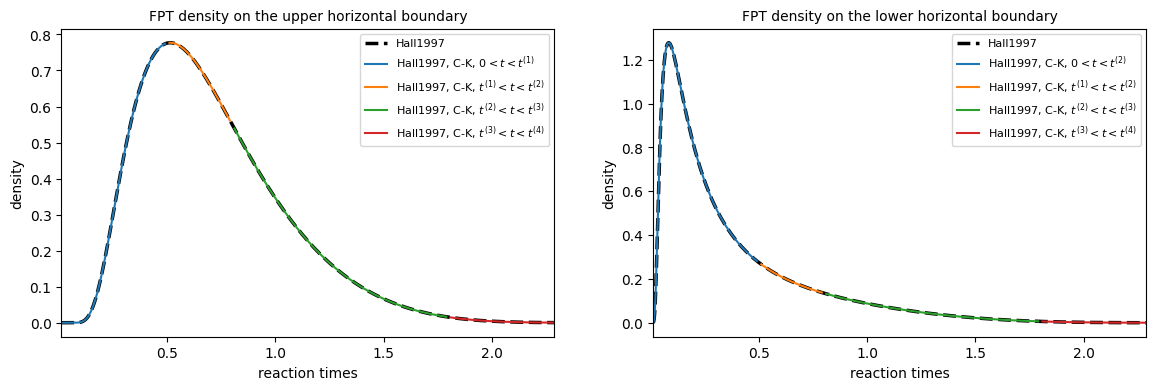

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), dpi=100)
ax[0].plot(ts, probu_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[0].plot(t1s, p1u_seq_list, label="Hall1997, C-K, " + "$0 <t<t^{(1)}$")
ax[0].plot(t2s, p2u_seq_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[0].plot(t3s, p3u_seq_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[0].plot(t4s, p4u_seq_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[0].legend(fontsize=8)
ax[0].set_title("FPT density on the upper horizontal boundary", fontsize=10)
ax[0].set_xlabel("reaction times")
ax[0].set_ylabel("density")
ax[0].autoscale(tight=True, axis="x")

ax[1].plot(ts, probl_list, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[1].plot(t1s, p1l_seq_list, label="Hall1997, C-K, " + "$0<t<t^{(2)}$")
ax[1].plot(t2s, p2l_seq_list, label="Hall1997, C-K, " + "$t^{(1)}<t<t^{(2)}$")
ax[1].plot(t3s, p3l_seq_list, label="Hall1997, C-K, " + "$t^{(2)}<t<t^{(3)}$")
ax[1].plot(t4s, p4l_seq_list, label="Hall1997, C-K, " + "$t^{(3)}<t<t^{(4)}$")
ax[1].legend(fontsize=8)
ax[1].set_title("FPT density on the lower horizontal boundary", fontsize=10)
ax[1].set_xlabel("reaction times")
ax[1].set_ylabel("density")
ax[1].autoscale(tight=True, axis="x")

plt.show()

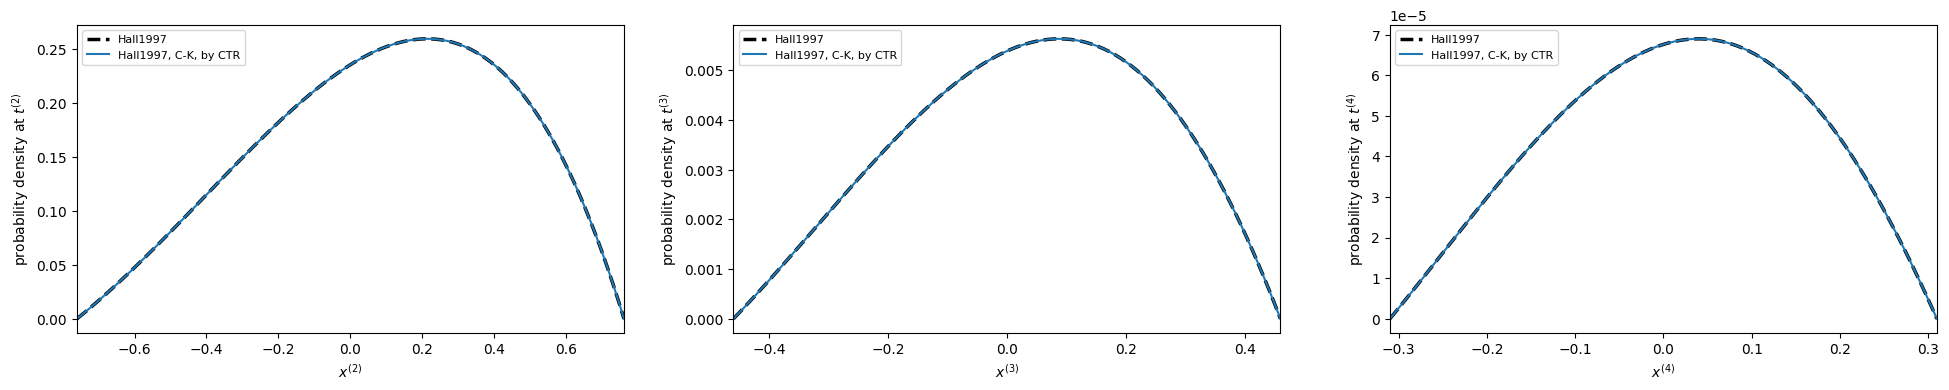

In [9]:
p2s = []
for x2 in x2s:
    p2s.append(p(x2, t2, x0, 0))
p3s = []
for x3 in x3s:
    p3s.append(p(x3, t3, x0, 0))
p4s = []
for x4 in x4s:
    p4s.append(p(x4, t4, x0, 0))

fig, ax = plt.subplots(1, 3, figsize=(24, 4), dpi=100)
ax[0].plot(x2s, p2s, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[0].plot(x2s, p2v_seq_list, label="Hall1997, C-K, by CTR")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("$x^{(2)}$")
ax[0].set_ylabel("probability density at $t^{(2)}$")
ax[0].autoscale(tight=True, axis="x")

ax[1].plot(x3s, p3s, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[1].plot(x3s, p3v_seq_list, label="Hall1997, C-K, by CTR")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("$x^{(3)}$")
ax[1].set_ylabel("probability density at $t^{(3)}$")
ax[1].autoscale(tight=True, axis="x")

ax[2].plot(x4s, p4s, color="k", linestyle="--", linewidth=2.5, label="Hall1997")
ax[2].plot(x4s, p4v_seq_list, label="Hall1997, C-K, by CTR")
ax[2].legend(fontsize=8)
ax[2].set_xlabel("$x^{(4)}$")
ax[2].set_ylabel("probability density at $t^{(4)}$")
ax[2].autoscale(tight=True, axis="x")

plt.show()